In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")

buddy = Path("rand/221019-133935")
nvalloc = Path("rand/221019-173814")

buddy_vm = Path("rand/220929-162050")
nvalloc_vm = Path("rand/220929-162928")


# KVM

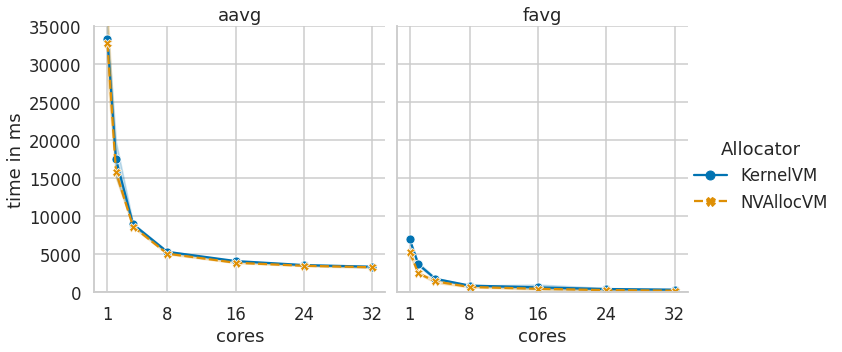

In [44]:
# Total time for the whole mapping / free
buddy_vm_d = pd.read_csv(buddy_vm / "out.csv")
buddy_vm_d["alloc"] = "KernelVM"
nvalloc_vm_d = pd.read_csv(nvalloc_vm / "out.csv")
nvalloc_vm_d["alloc"] = "NVAllocVM"


pgd = pd.concat([buddy_vm_d, nvalloc_vm_d], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "alloc", "aavg", "favg", "iteration"]].melt(
    id_vars=["cores", "alloc", "iteration"],
    value_vars=["aavg", "favg"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["KernelVM", "NVAllocVM"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", col_wrap=2, style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, 35000))
g.legend.set_title("Allocator")
g.set(ylabel="time in ms")
g.set(xlabel="cores")
g.set_titles("{col_name}")


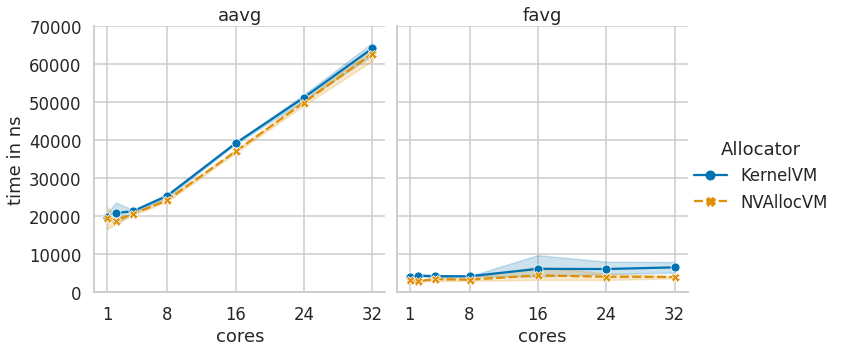

In [43]:
# Time per page access
buddy_vm_d = pd.read_csv(buddy_vm / "out.csv")
buddy_vm_d["alloc"] = "KernelVM"
nvalloc_vm_d = pd.read_csv(nvalloc_vm / "out.csv")
nvalloc_vm_d["alloc"] = "NVAllocVM"


pgd = pd.concat([buddy_vm_d, nvalloc_vm_d], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "mem", "alloc", "aavg", "favg", "iteration"]].melt(
    id_vars=["cores", "mem", "alloc", "iteration"],
    value_vars=["aavg", "favg"], value_name="time")
pgd["time"] *= 1000_0000  # ms to ns
pgd["time"] *= pgd["cores"]  # total time
pgd["time"] /= pgd["mem"] * 512 * 512  # per allocation
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["KernelVM", "NVAllocVM"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", col_wrap=2, style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, 70000))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


# Bare Metal

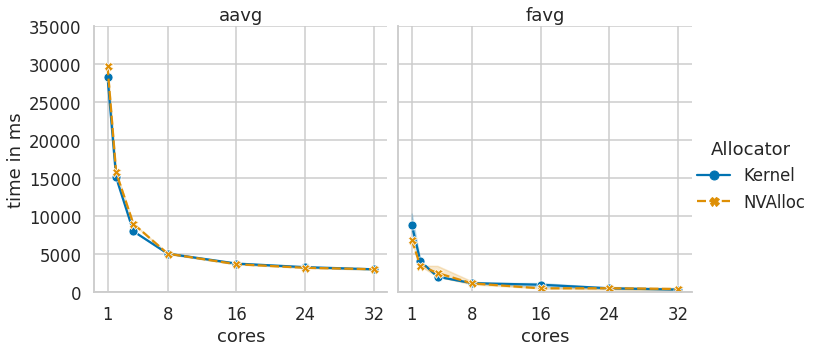

In [37]:
buddy_d = pd.read_csv(buddy / "out.csv")
buddy_d["alloc"] = "Kernel"
nvalloc_d = pd.read_csv(nvalloc / "out.csv")
nvalloc_d["alloc"] = "NVAlloc"


pgd = pd.concat([buddy_d, nvalloc_d], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "alloc", "aavg", "favg", "iteration"]].melt(
    id_vars=["cores", "alloc", "iteration"],
    value_vars=["aavg", "favg"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["Kernel", "NVAlloc"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", col_wrap=2, style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, 35000))
g.legend.set_title("Allocator")
g.set(ylabel="time in ms")
g.set(xlabel="cores")
g.set_titles("{col_name}")


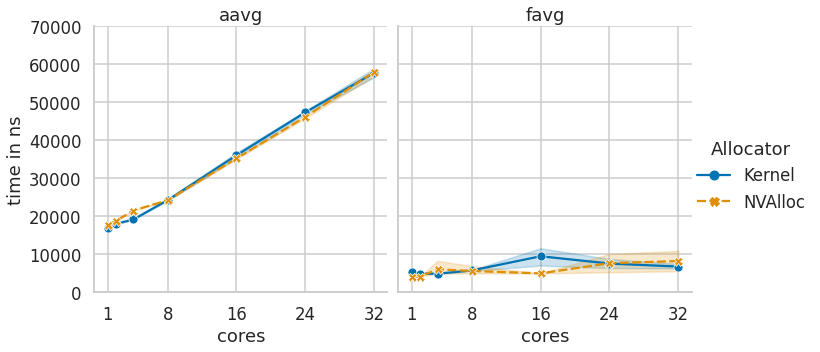

In [3]:
# Time per page access
buddy_d = pd.read_csv(buddy / "out.csv")
buddy_d["alloc"] = "Kernel"
nvalloc_d = pd.read_csv(nvalloc / "out.csv")
nvalloc_d["alloc"] = "NVAlloc"


pgd = pd.concat([buddy_d, nvalloc_d], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "mem", "alloc", "aavg", "favg", "iteration"]].melt(
    id_vars=["cores", "mem", "alloc", "iteration"],
    value_vars=["aavg", "favg"], value_name="time")
pgd["time"] *= 1000_0000  # ms to ns
pgd["time"] *= pgd["cores"]  # total time
pgd["time"] /= pgd["mem"] * 512 * 512  # per allocation
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["Kernel", "NVAlloc"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", col_wrap=2, style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, 70000))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


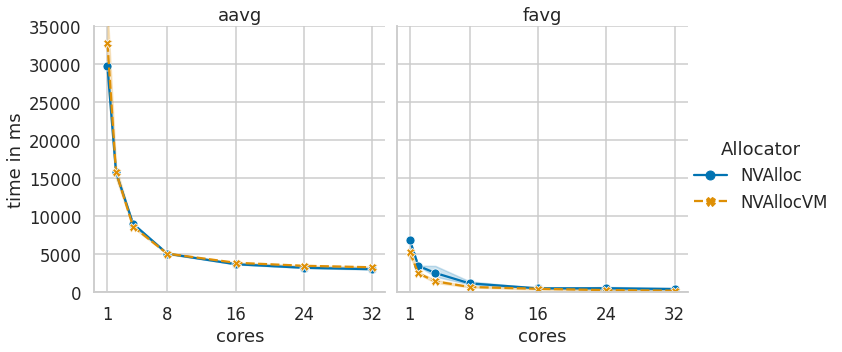

In [38]:
nvalloc_d = pd.read_csv(nvalloc / "out.csv")
nvalloc_d["alloc"] = "NVAlloc"
nvalloc_vm_d = pd.read_csv(nvalloc_vm / "out.csv")
nvalloc_vm_d["alloc"] = "NVAllocVM"


pgd = pd.concat([nvalloc_d, nvalloc_vm_d], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "alloc", "aavg", "favg", "iteration"]].melt(
    id_vars=["cores", "alloc", "iteration"],
    value_vars=["aavg", "favg"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["NVAlloc", "NVAllocVM"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", col_wrap=2, style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, 35000))
g.legend.set_title("Allocator")
g.set(ylabel="time in ms")
g.set(xlabel="cores")
g.set_titles("{col_name}")


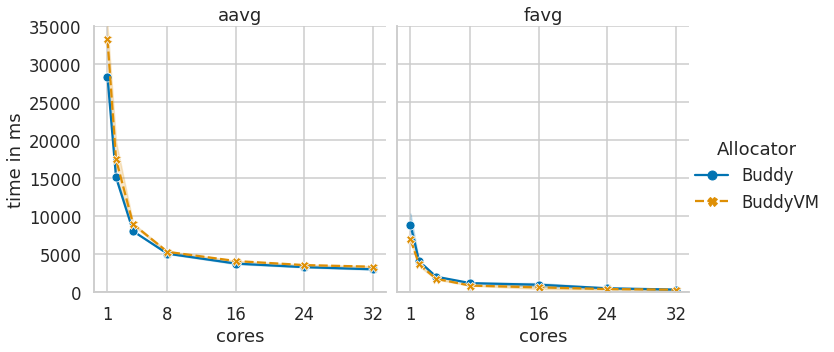

In [39]:
buddy_d = pd.read_csv(buddy / "out.csv")
buddy_d["alloc"] = "Buddy"
buddy_vm_d = pd.read_csv(buddy_vm / "out.csv")
buddy_vm_d["alloc"] = "BuddyVM"


pgd = pd.concat([buddy_d, buddy_vm_d], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "alloc", "aavg", "favg", "iteration"]].melt(
    id_vars=["cores", "alloc", "iteration"],
    value_vars=["aavg", "favg"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["Buddy", "BuddyVM"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", col_wrap=2, style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, 35000))
g.legend.set_title("Allocator")
g.set(ylabel="time in ms")
g.set(xlabel="cores")
g.set_titles("{col_name}")
